<a href="https://colab.research.google.com/github/Renee0330/bob_study_allFiles/blob/main/02_Tutorial_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 3: Coding Demo

## In this section, we aim to demonstrate:
### 1. How to define and plot undirected and directed graph?
### 2. How to calculate following five centrality calculation methods with only numpy package? And we will compare our results with the results generated by networkx. All the graph examples we used in this manuscript are shown in the lecture sildes.
#### 2.1 In-degree Centrality
#### 2.2 Closeness Centrality
#### 2.3 Harmonic Centrality
#### 2.4 Eigen Centrality
#### 2.5 Katz Centrality

#### 2.1 In-degree Centrality

* In-degree centrality is a measure of the importance of a node in a directed graph based on the number of incoming edges it has.
* Nodes with a high in-degree centrality are those that are often the target of edges in the network, indicating that they are important to the overall flow of information or influence in the network.

* The formula for in-degree centrality is as follows:
$$C_{D}(v) = d_{in}(v)$$
  * Where $C_D(v)$ is the in-degree centrality of node v, and
  * $d_{in}(v)$ is the number of incoming edges to node v.


* In the networkx Python package, the formula for in-degree centrality is as follows: $$C_{D}(v) = \frac{d_{in}(v)}{n-1}$$
  * Where $n$ is the total number of nodes in the network.
    * The difference is that the normalization term, (n-1), is utilized in the networkx Python package.
    * The core idea and concept remain the same, and when it comes to centrality, the relative sizes of different nodes remain unchanged.
    * Closeness centrality (CC) was  defined by L. C. Freeman in 1978 in his paper [1]. In Freeman's definition of CC, there is no (n-1) term. Freeman can be considered a pioneer in the field of complex networks.


[1] L. C. Freeman, “Centrality in social networks conceptual clarification,”
Social Networks 1, 215–239 (1978).

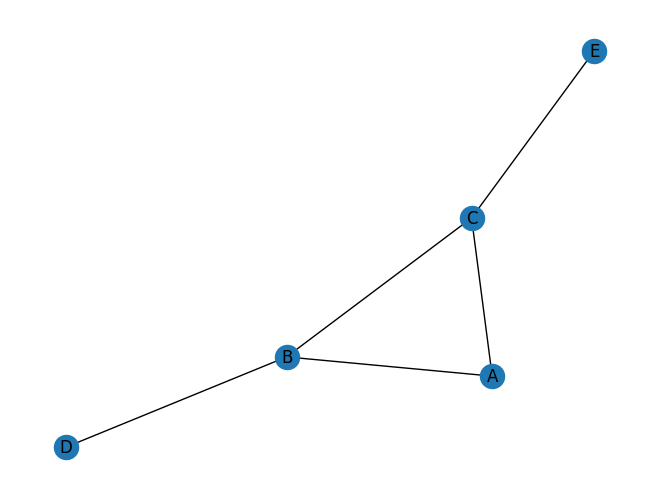

In [1]:
import networkx as nx
# NetworkX is a python package for the study of graphs.
# NetworkX document: https://networkx.org/


graph = {'A': ['B','C'],
         'B': ['A','D'],
         'C': ['A','B','E'],
         'D': ['B'],
         'E': ['C'],}
# The graph is represented using an adjacency list where each node is a key and its values are the adjacent nodes.

# This function is defined to plot the graph.
  # graph:邻接表格式的图
  # diGraph：True为有向图，False为无向图
def plot_graph(graph, diGraph = False):
    # 如果diGraph=True创建有向图，否则创建无向图
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()

    # 创建图
    # 遍历邻接表，添加边：key为节点，value为邻居节点列表
    for key, value in graph.items():
      for neighbor in value:
        # Add an edge between the node and its neighbor
        # g.add_edge(u, v) g为Graph或DiGraph对象，给u,v两个节点添加一条边
        g.add_edge(key,neighbor)

    # 绘图函数
    # with_labels=True 表示在节点上显示名字
    nx.draw(g, with_labels=True)

# 该函数返回一个NetworkX的图对象
def graph_networkx(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()

    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
          # Add an edge between the node and its neighbor.
          g.add_edge(key,neighbor)
    return g

# Plot the given graph.
plot_graph(graph)

In [ ]:
def in_degree_centrality(graph):
    # This function outputs an Graph object from networkx package.
    g = nx.DiGraph()
    # Create a directed graph object.

    in_degrees = {key:0 for key in graph}
    # print(in_degrees) #{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            in_degrees[neighbor] += 1

    return in_degrees
print('In-degree Centrality in the package: ',in_degree_centrality(graph))

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
In-degree Centrality in the package:  {'A': 2, 'B': 3, 'C': 2, 'D': 1, 'E': 1}


#### 2.2 Closeness Centrality


Closeness centrality is a measure of how central a node is in a network based on its average shortest path to all other nodes in the network. It is defined as the reciprocal of the sum of the shortest path distances from a node to all other nodes in the network. Nodes with high closeness centrality are considered to be more central and influential in the network.

The formula for calculating closeness centrality of a node is as follows:

$$ C_c(u) = \frac{1}{\sum_{v \in V} d(u,v)} $$

where $C_c(u)$ is the closeness centrality of node $u$, $V$ is the set of all nodes in the network, and $d(u,v)$ is the shortest path distance between node $u$ and node $v$.

In the networkx Python package, the formula for in-degree centrality is as follows: $$C_c(u) = \frac{n-1}{\sum_{v \in V} d(u,v)}$$ $n$ is the total number of nodes in the network. The difference is that the normalization term, (n-1), is utilized in the networkx Python package. The core idea and concept remain the same, and when it comes to centrality, the relative sizes of different nodes remain unchanged.

closeness centrality in the slides:  {'A': 0.16666666666666666, 'B': 0.2, 'C': 0.2, 'D': 0.125, 'E': 0.125}
closeness centrality in the package:  {'A': 0.6666666666666666, 'B': 0.8, 'C': 0.8, 'D': 0.5, 'E': 0.5}


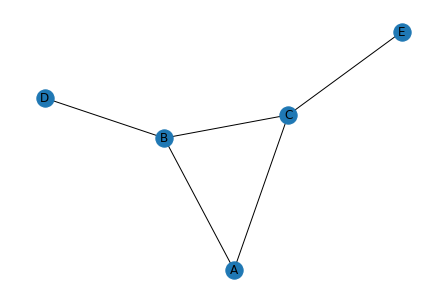

In [ ]:
graph = {'A': ['B','C'],
         'B': ['A','C','D'],
         'C': ['A','B','E'],
         'D': ['B'],
         'E': ['C']
        }

def bfs(adj_list, start_node):
    # Initialize visited dictionary to keep track of which nodes have been visited
    visited = {node: False for node in adj_list}
    # Set the starting node to visited
    visited[start_node] = True
    # We use "inf" to represent nodes that are not reachable from the starting node
    dist = {node: float("inf") for node in adj_list}
    dist[start_node] = 0
    # Initialize a queue to hold the nodes to be visited
    queue = [start_node]
    # Perform BFS algorithm
    while queue:
        # Dequeue the node at the front of the queue
        curr_node = queue.pop(0)
        # Visit all the neighbors of the current node
        for neighbor in adj_list[curr_node]:
            if not visited[neighbor]:
                # Mark the neighbor as visited
                visited[neighbor] = True
                # Update the distance of the neighbor from the starting node
                dist[neighbor] = dist[curr_node] + 1
                # Enqueue the neighbor to be visited later
                queue.append(neighbor)
    # Return the distance dictionary
    return dist


def closeness_centrality(adj_list):
    # Get the number of nodes in the graph
    num_nodes = len(adj_list)
    # Initialize a dictionary to hold the closeness centrality of each node
    cc = {}
    # Compute the closeness centrality for each node in the graph
    for node in adj_list:
        # Run BFS algorithm starting from the current node
        dist = bfs(adj_list, node)
        # Compute the total distance of the current node from all other nodes
        total_dist = sum(dist.values())
        # Compute the closeness centrality of the current node
        if total_dist > 0:
            cc[node] = 1 / total_dist
        else:
            cc[node] = 0
    # Return the closeness centrality dictionary
    return cc


plot_graph(graph)
print("closeness centrality in the slides: ", closeness_centrality(graph))
print("closeness centrality in the package: ", nx.closeness_centrality(graph_networkx(graph)))

#### 2.3 Harmonic Centrality

Harmonic centrality is a measure of the importance of a node in a network based on the sum of the reciprocals of the shortest path distances between that node and all other nodes in the network. It is similar to closeness centrality, but instead of taking the inverse of the path lengths, it takes the sum of the inverses. This enables it deal with infinite values.

The formula for harmonic centrality of a node $v$ is:

$$H(v) = \sum_{u\neq v} \frac{1}{d(u,v)}$$

where $d(u,v)$ is the shortest path distance between nodes $u$ and $v$.

harmonic centrality in the slides:  {'A': 3.0, 'B': 3.5, 'C': 3.5, 'D': 2.3333333333333335, 'E': 2.3333333333333335}
harmonic centrality in the package:  {'C': 3.5, 'E': 2.3333333333333335, 'A': 3.0, 'D': 2.3333333333333335, 'B': 3.5}


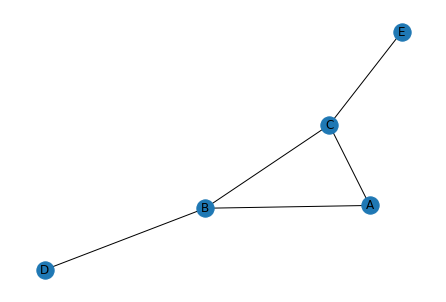

In [ ]:
graph = {'A': ['B','C'],
         'B': ['A','C','D'],
         'C': ['A','B','E'],
         'D': ['B'],
         'E': ['C']
        }

def harmonic_centrality(adj_list):
    num_nodes = len(adj_list)
    hc = {}
    for node in adj_list:
        dist = bfs(adj_list, node)
        hc[node] = 0
        # Sum the distances of a node to all other nodes
        for number in [v for k, v in dist.items() if k != node]:
            if number != float('inf'):
                hc[node] += (1 / number)
            else:
                hc[node] += 0
    return hc

plot_graph(graph)
print("harmonic centrality in the slides: ", harmonic_centrality(graph))
print("harmonic centrality in the package: ", nx.harmonic_centrality(graph_networkx(graph)))

#### 2.4 Eigen Centrality

Eigen centrality is a measure of centrality based on the concept of eigenvectors and eigenvalues from linear algebra. It measures the influence of a node in a network based on its connections to other highly connected nodes. A node with high eigen centrality is one that is connected to many other highly connected nodes, while a node with low eigen centrality is one that is not well connected to other highly connected nodes. Please refer to the pseudocode of Eigen Centrality in the slides. The code strictly follows every step in the pseudocode.

The the values of $c^{k}$ in first three iterations are consistent with the slides.


adjacency matrix of the graph: 
 [[0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]]
Interation 1: the value of the eigen centrality: [1. 1. 1. 1. 1.]
Interation 2: the value of the eigen centrality: [0.34299717 0.68599434 0.51449576 0.17149859 0.34299717]
Interation 3: the value of the eigen centrality: [0.44997704 0.51425948 0.51425948 0.25712974 0.44997704]
Interation 4: the value of the eigen centrality: [0.38401229 0.62401997 0.5280169  0.19200614 0.38401229]
Interation 5: the value of the eigen centrality: [0.4294625  0.5547224  0.51893386 0.23262552 0.4294625 ]
Interation 6: the value of the eigen centrality: [0.39998222 0.59997334 0.52664326 0.20665748 0.39998222]
Interation 7: the value of the eigen centrality: [0.41959647 0.57104845 0.52139207 0.22345374 0.41959647]
Interation 8: the value of the eigen centrality: [0.40682048 0.5898897  0.52516826 0.21265616 0.40682048]
Interation 9: the value of the eigen centrality: [0.4152226  0.57773

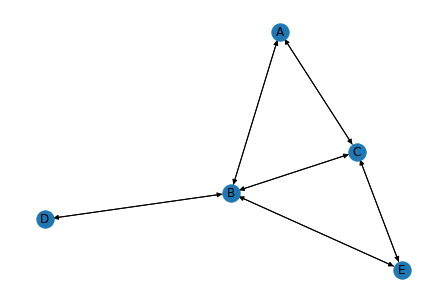

In [ ]:
import numpy as np


def eigen_centrality(adj_list):

    n = len(adj_list)
    nodes = sorted(list(graph.keys()))
    # Initialize the adjacency matrix with zeros
    A = np.zeros((n, n))

    # Populate the adjacency matrix
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if nodes[j] in graph[nodes[i]]:
                A[i][j] = 1
    print('adjacency matrix of the graph: \n', A)


    # Calculate eigenvector of A
    v = np.ones(n)
    prev_v = np.zeros(n)
    eps = 1e-6
    # L-2 normalization
    count = 0
    while np.linalg.norm(v - prev_v) > eps:
        count = count+ 1
        print('Interation {}: the value of the eigen centrality: {}'.format(count,v))
        prev_v = v
        v = np.dot(A.T, v)
        # Normalize eigenvector
        v = v / np.linalg.norm(v)

    # Return dictionary of node centrality scores
    cc = {i: v[i] for i in range(n)}
    return cc

graph = {'A': ['B','C'],
         'B': ['A','C','D','E'],
         'C': ['A', 'B','E'],
         'D': ['B'],
         'E': ['B','C']
        }
plot_graph(graph, diGraph=True)
print("eigen centrality in the slides: ", eigen_centrality(graph))
slide_answer = [1, 1.41, 1.27,0.52, 1]
print("answer in the slide: {}, and after normalization: {}".format(slide_answer, slide_answer/np.linalg.norm(slide_answer)))
print('eigen Centrality in the package: ', nx.eigenvector_centrality(graph_networkx(graph,True)))


#### 2.5 Katz Centrality

Katz centrality is another measure of node centrality in a network, similar to the concept of eigenvector centrality. The intuition behind Katz centrality is that nodes are important if they are connected to other important nodes. $\alpha$ and $\beta$ act as the controlling term and bias term to capture the topological and external information.

$$ \boldsymbol{C}_{Katz} = \alpha A ^{T} \boldsymbol{C}_{katz} + \beta * \boldsymbol{1} $$

adjacency matrix of the graph: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]]
Interation 1: the value of the eigen centrality: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Interation 2: the value of the eigen centrality: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Interation 3: the value of the eigen centrality: [1.   1.   1.   1.15 1.15 2.05 1.15 1.   1.15 1.   1.9 ]
Interation 4: the value of the eigen centrality: [1.     1.     1.     1.1725 1.285  2.2525 1.3075 1.     1.285  1.
 1.9225]
Interation 5: the value of the eigen centrality: [1.       1.       1.       1.19275  1.288375 2.32     1.337875 1.
 1.288375 1.       1.94275 ]
Interation 6: the value of

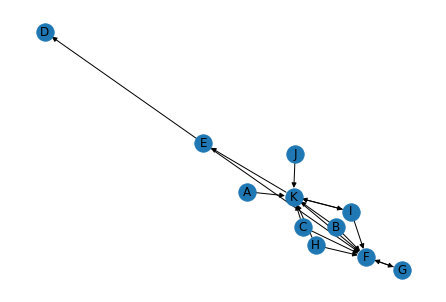

In [ ]:
def katz_centrality(adj_list, alpha, beta):

    n = len(adj_list)
    nodes = sorted(list(graph.keys()))
    # Initialize the adjacency matrix with zeros
    A = np.zeros((n, n))

    # Populate the adjacency matrix
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if nodes[j] in graph[nodes[i]]:
                A[i][j] = 1
    print('adjacency matrix of the graph: \n', A)


    # Calculate eigenvector of A
    v = np.zeros(n)
    prev_v = np.ones(n)
    eps = 1e-6
    # L-2 normalization
    count = 0
    while np.linalg.norm(v - prev_v,  ord=1) > eps:
        count = count+ 1
        print('Interation {}: the value of the eigen centrality: {}'.format(count,v))
        prev_v = v
        # Follow the persudo-code
        v = alpha * (np.dot(A.T, v)) + beta * np.ones(n)
        # Normalize eigenvector
        # v = v / np.linalg.norm(v)

    # Return dictionary of node centrality scores
    cc = {i: v[i] for i in range(n)}
    return cc

graph = {'A': ['K'],
         'B': ['K','F'],
         'C': ['K', 'F'],
         'D':[],
         'E': ['D','F'],
         'F': ['G'],
         'G': ['F'],
         'H': ['F','K'],
         'I': ['F','K'],
         'J':['K'],
         'K':['F','I','E']
        }
plot_graph(graph, diGraph=True)

print("katz centrality in the slides: ", katz_centrality(graph,0.15,1))

print('katz Centrality in the package: ', nx.katz_centrality(graph_networkx(graph,True),0.15,1, normalized=False))